# Assignment 3

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Packages Used
- Keras [link](https://keras.io/guides/)

## Submission
- Rename the notebook to `<roll_number>_Assignment3_Q1.ipynb`.

## Question 1

This question is based on seminal work by Zhang et al. The paper is titled 'Understanding deep learning requires rethinking generalization'. The paper talks about how the traditional methods fail to explain generalization of neural network. They show that a sufficiently parameterized network can easily fit a random labeling of the training data. This fitting cannot be curbed by explicit regularization.


## Q) 1.1 
Lets take a hello world dataset for ML algorithm the MNIST!
This question requires you to train a convolutional neural network.
Architecture: 4 layers of convolution with 64 filters in each layer. Keep activation map size same using padding.

In [18]:
from tensorflow import keras   # feel free to use MNIST data from other sources 
import numpy as np
import random
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [19]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [20]:
# convert from integers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize to range 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

print("Train data shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

Train data shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### One-hot-encode your labels here

In [21]:
def encode(y):
    return to_categorical(y)

print ('label shape: ',np.shape(y_train),np.shape(y_test))
y_train = encode(y_train)
y_test = encode(y_test)
print ('label shape: ',np.shape(y_train),np.shape(y_test))

label shape:  (60000,) (10000,)
label shape:  (60000, 10) (10000, 10)


#### Define the model mentioned above
    1) Print the number of trainable parameters
     Use sgd optimizer with softmax at last layer 
     Train the model until convergence (use test data only for model selection and early stopping!)
    2) Report the train and test accuracy
    3) Plot the train and test accuracy and loss throughout the training

In [22]:
def define_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    return model


def run_model(x_train, y_train, x_test, y_test):
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model = define_model()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    # using callback for early stopping
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    total_epochs = 10
    history = model.fit(x_train, y_train, epochs=total_epochs, batch_size=32, validation_split=0.30, callbacks=[callback])

    print('Model Summary:')
    model.summary()

    # plotting accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training_accuracy', 'validation_accuracy'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training_loss', 'validation_loss'], loc='upper left')
    plt.show()

    # evaluate model
    _, acc = model.evaluate(x_test, y_test, verbose=0)
    
    # Printing final accuracies 
    print('Accuracy on train dataset is: ',history.history['loss'][total_epochs-1]*100)    
    print('Accuracy on test dataset is: ',acc * 100.0)

Epoch 1/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.1514 - accuracy: 0.9534 - val_loss: 0.0680 - val_accuracy: 0.9803
Epoch 2/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0439 - accuracy: 0.9865 - val_loss: 0.0574 - val_accuracy: 0.9832
Epoch 3/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0263 - accuracy: 0.9913 - val_loss: 0.0575 - val_accuracy: 0.9850
Epoch 4/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.0524 - val_accuracy: 0.9871
Epoch 5/10
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0104 - accuracy: 0.9968 - val_loss: 0.0599 - val_accuracy: 0.9879
Epoch 6/10
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0084 - accuracy: 0.9973 - val_loss: 0.0636 - val_accuracy: 0.9867
Epoch 7/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.0679 - val_accu

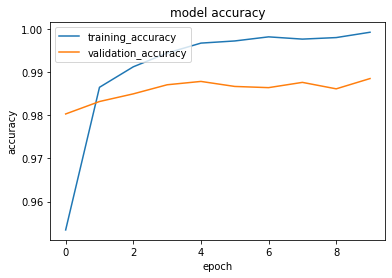

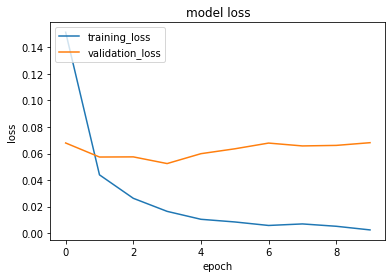

Accuracy on train dataset is:  0.24383270647376776
Accuracy on test dataset is:  98.84999990463257


In [23]:
run_model(x_train, y_train, x_test, y_test)

## Q) 1.2
Now lets start adding label noise to the dataset


1) Randomize 20% of train labels and repeat Q1 (1,2 & 3)

2) Randomize 40% of train labels and repeat Q1 (3)

3) Randomize 60% of train labels and repeat Q1 (3)

4) Randomize 80% of train labels and repeat Q1 (3)

5) Randomize 100% of train labels and repeat Q1 (3)


In [24]:
# Randomize 20% of train labels and repeat Q1

def noise_run(percentage_of_randomnoise):
    new_ytrain = y_train.copy()
    train_sz = len(new_ytrain)
    indices = random.sample(range(0,train_sz),(percentage_of_randomnoise*train_sz)//100)

    for ind in indices:
        lst = np.zeros(10)
        random_class = random.randint(0,9)
        lst[random_class] = 1.0
        new_ytrain[ind] = np.array(lst)
        
    run_model(x_train, new_ytrain, x_test, y_test)

Epoch 1/10
1313/1313 [==============================] - 10s 8ms/step - loss: 1.0755 - accuracy: 0.7716 - val_loss: 1.0164 - val_accuracy: 0.7993
Epoch 2/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.9515 - accuracy: 0.8027 - val_loss: 0.9750 - val_accuracy: 0.8015
Epoch 3/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.9078 - accuracy: 0.8087 - val_loss: 0.9687 - val_accuracy: 0.8028
Epoch 4/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.8599 - accuracy: 0.8112 - val_loss: 1.0201 - val_accuracy: 0.8031
Epoch 5/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.7957 - accuracy: 0.8145 - val_loss: 1.0302 - val_accuracy: 0.7978
Epoch 6/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.6968 - accuracy: 0.8224 - val_loss: 1.1148 - val_accuracy: 0.7816
Epoch 7/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.5620 - accuracy: 0.8431 - val_loss: 1.2737 - val_accura

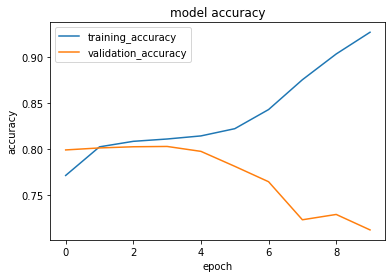

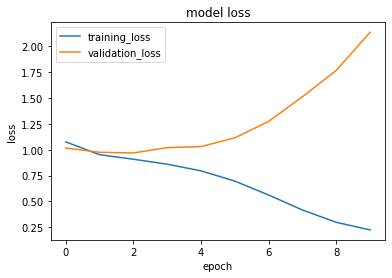

Accuracy on train dataset is:  22.517259418964386
Accuracy on test dataset is:  86.65000200271606


In [25]:
# 20% noisy data
noise_run(20)

Epoch 1/10
1313/1313 [==============================] - 9s 7ms/step - loss: 1.6114 - accuracy: 0.5932 - val_loss: 1.5537 - val_accuracy: 0.6195
Epoch 2/10
1313/1313 [==============================] - 9s 7ms/step - loss: 1.5111 - accuracy: 0.6237 - val_loss: 1.5286 - val_accuracy: 0.6243
Epoch 3/10
1313/1313 [==============================] - 9s 7ms/step - loss: 1.4646 - accuracy: 0.6290 - val_loss: 1.5419 - val_accuracy: 0.6237
Epoch 4/10
1313/1313 [==============================] - 9s 7ms/step - loss: 1.4039 - accuracy: 0.6321 - val_loss: 1.5905 - val_accuracy: 0.6169
Epoch 5/10
1313/1313 [==============================] - 9s 7ms/step - loss: 1.3051 - accuracy: 0.6382 - val_loss: 1.6639 - val_accuracy: 0.6004
Epoch 6/10
1313/1313 [==============================] - 9s 7ms/step - loss: 1.1512 - accuracy: 0.6595 - val_loss: 1.7914 - val_accuracy: 0.5758
Epoch 7/10
1313/1313 [==============================] - 10s 7ms/step - loss: 0.9266 - accuracy: 0.7088 - val_loss: 2.1194 - val_accuracy

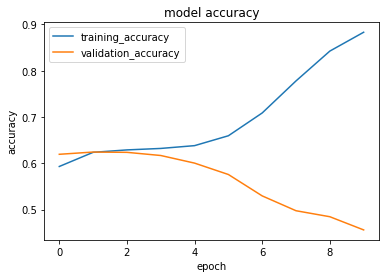

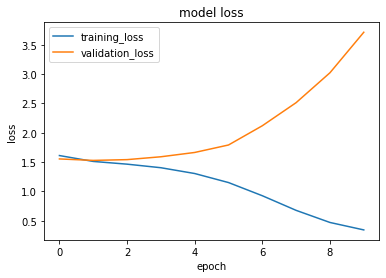

Accuracy on train dataset is:  34.41188335418701
Accuracy on test dataset is:  69.80000138282776


In [26]:
# 40% noisy data
noise_run(40)

Epoch 1/10
1313/1313 [==============================] - 10s 8ms/step - loss: 1.9897 - accuracy: 0.4189 - val_loss: 1.9475 - val_accuracy: 0.4368
Epoch 2/10
1313/1313 [==============================] - 10s 8ms/step - loss: 1.9183 - accuracy: 0.4466 - val_loss: 1.9598 - val_accuracy: 0.4412
Epoch 3/10
1313/1313 [==============================] - 10s 7ms/step - loss: 1.8828 - accuracy: 0.4509 - val_loss: 1.9475 - val_accuracy: 0.4419
Epoch 4/10
1313/1313 [==============================] - 9s 7ms/step - loss: 1.8332 - accuracy: 0.4543 - val_loss: 1.9726 - val_accuracy: 0.4366
Epoch 5/10
1313/1313 [==============================] - 9s 7ms/step - loss: 1.7537 - accuracy: 0.4607 - val_loss: 2.0410 - val_accuracy: 0.4129
Epoch 6/10
1313/1313 [==============================] - 10s 8ms/step - loss: 1.6221 - accuracy: 0.4855 - val_loss: 2.1508 - val_accuracy: 0.3842
Epoch 7/10
1313/1313 [==============================] - 9s 7ms/step - loss: 1.4026 - accuracy: 0.5428 - val_loss: 2.3961 - val_accur

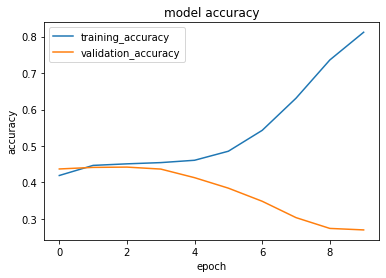

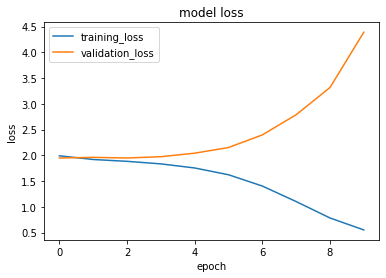

Accuracy on train dataset is:  55.07362484931946
Accuracy on test dataset is:  53.56000065803528


In [27]:
# 60% noisy data
noise_run(60)

Epoch 1/10
1313/1313 [==============================] - 9s 7ms/step - loss: 2.2440 - accuracy: 0.2265 - val_loss: 2.2107 - val_accuracy: 0.2622
Epoch 2/10
1313/1313 [==============================] - 10s 7ms/step - loss: 2.2034 - accuracy: 0.2622 - val_loss: 2.2003 - val_accuracy: 0.2689
Epoch 3/10
1313/1313 [==============================] - 10s 7ms/step - loss: 2.1868 - accuracy: 0.2670 - val_loss: 2.2066 - val_accuracy: 0.2667
Epoch 4/10
1313/1313 [==============================] - 9s 7ms/step - loss: 2.1654 - accuracy: 0.2701 - val_loss: 2.2170 - val_accuracy: 0.2642
Epoch 5/10
1313/1313 [==============================] - 9s 7ms/step - loss: 2.1321 - accuracy: 0.2750 - val_loss: 2.2487 - val_accuracy: 0.2465
Epoch 6/10
1313/1313 [==============================] - 9s 7ms/step - loss: 2.0758 - accuracy: 0.2891 - val_loss: 2.2681 - val_accuracy: 0.2302
Epoch 7/10
1313/1313 [==============================] - 9s 7ms/step - loss: 1.9671 - accuracy: 0.3213 - val_loss: 2.3612 - val_accurac

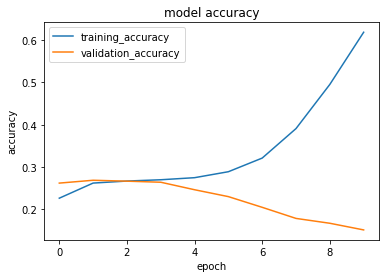

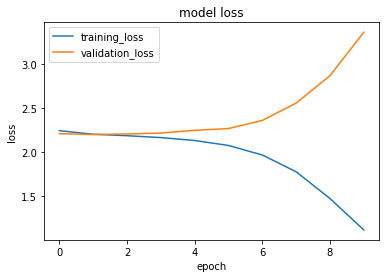

Accuracy on train dataset is:  111.409592628479
Accuracy on test dataset is:  35.179999470710754


In [28]:
# 80% noisy data
noise_run(80)

Epoch 1/10
1313/1313 [==============================] - 10s 7ms/step - loss: 2.3043 - accuracy: 0.1000 - val_loss: 2.3034 - val_accuracy: 0.1004
Epoch 2/10
1313/1313 [==============================] - 10s 7ms/step - loss: 2.3026 - accuracy: 0.1047 - val_loss: 2.3059 - val_accuracy: 0.0994
Epoch 3/10
1313/1313 [==============================] - 9s 7ms/step - loss: 2.3007 - accuracy: 0.1112 - val_loss: 2.3058 - val_accuracy: 0.0966
Epoch 4/10
1313/1313 [==============================] - 9s 7ms/step - loss: 2.2943 - accuracy: 0.1231 - val_loss: 2.3073 - val_accuracy: 0.1028
Epoch 5/10
1313/1313 [==============================] - 9s 7ms/step - loss: 2.2782 - accuracy: 0.1419 - val_loss: 2.3235 - val_accuracy: 0.1007
Epoch 6/10
1313/1313 [==============================] - 9s 7ms/step - loss: 2.2403 - accuracy: 0.1696 - val_loss: 2.3692 - val_accuracy: 0.0997
Epoch 7/10
1313/1313 [==============================] - 9s 7ms/step - loss: 2.1614 - accuracy: 0.2137 - val_loss: 2.4143 - val_accurac

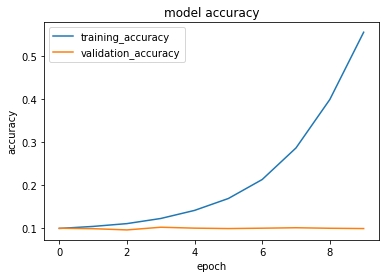

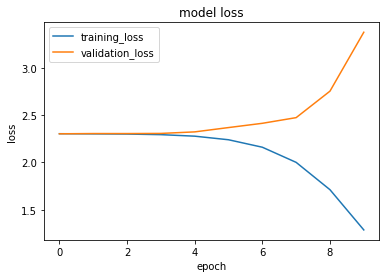

Accuracy on train dataset is:  128.68236303329468
Accuracy on test dataset is:  9.229999780654907


In [29]:
# 100% noisy data
noise_run(100)